In [2]:
# Import the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [3]:
# Read the pickled dataset
df = pd.read_pickle("/kaggle/input/dataset-elutions/complete_df.pkl")
df.shape

(157824, 10)

In [4]:
df.shape

(157824, 10)

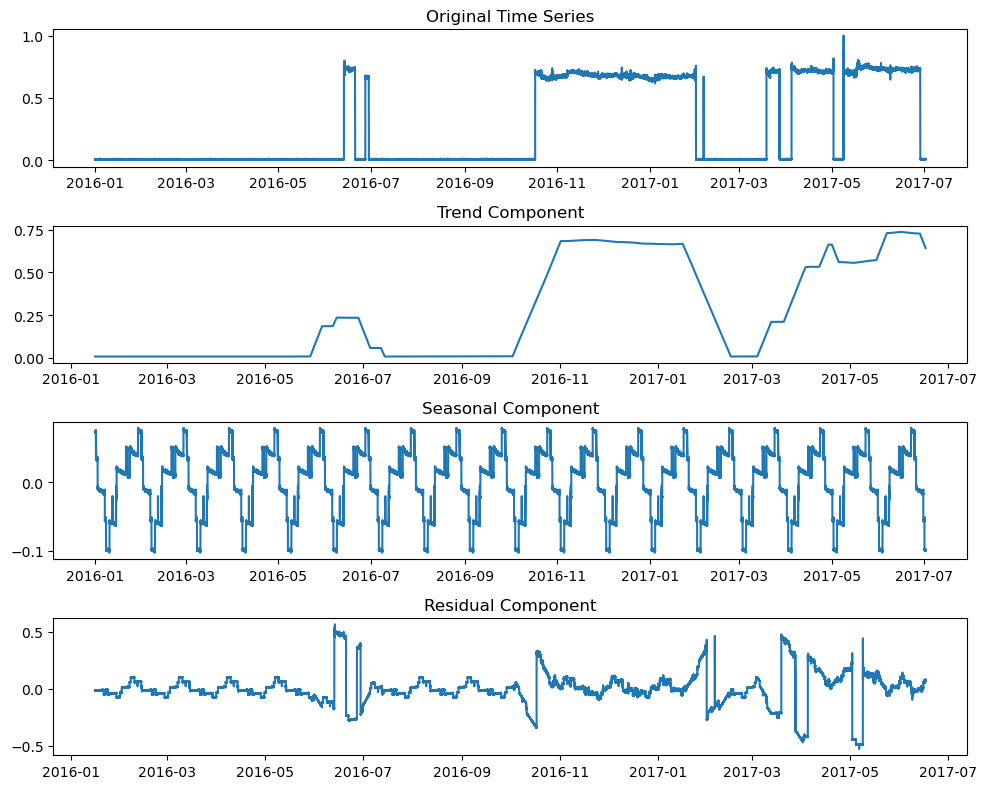

In [5]:
# Perform seasonal decomposition for 30 day time period (y1)
decomposition = seasonal_decompose(df['y1'], model='additive', period=288*30)

# Extract the trend, seasonality, and residual components
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

axs[0].plot(df['y1'])
axs[0].set_title('Original Time Series')

axs[1].plot(trend)
axs[1].set_title('Trend Component')

axs[2].plot(seasonality)
axs[2].set_title('Seasonal Component')

axs[3].plot(residual)
axs[3].set_title('Residual Component')

plt.tight_layout()
plt.show()

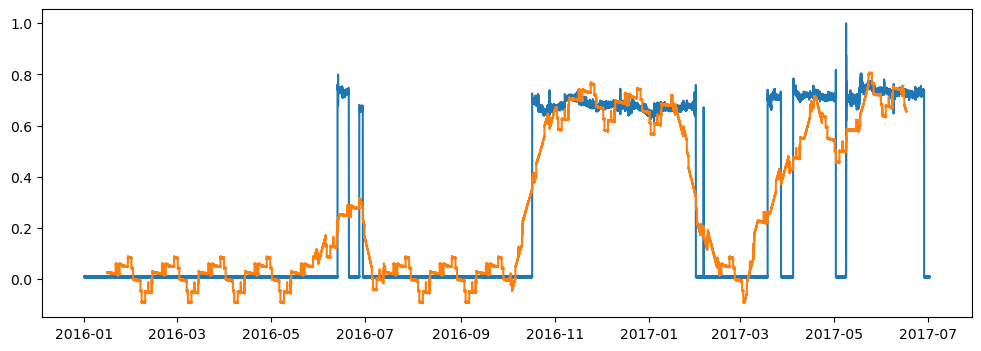

In [6]:
# Plot the coverage of trend and seasonality
estimated = trend+seasonality
plt.figure(figsize=(12, 4))
plt.plot(df['y1'])
plt.plot(estimated)

In [7]:
# Calculate residual mean and standard deviation 

residMean = residual.mean()
residSigma = residual.std()

# Calculate upper & lower bound
# Threshold is +/-2 SD

lower = residMean- 2*residSigma
upper = residMean+ 2*residSigma

(16801.0, 17348.0)

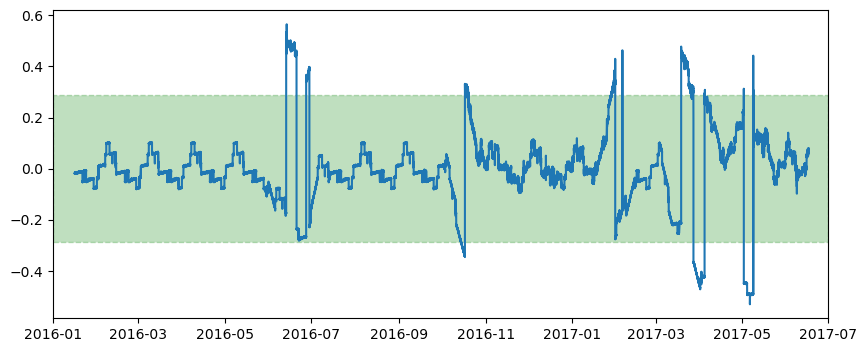

In [8]:
# Plot the threshold boundaries
plt.figure(figsize = (10,4))
plt.plot(residual)
plt.fill_between([datetime(2016,1,1), datetime(2017,7,1)], lower, upper, color = 'g',
                alpha = 0.25, linestyle = '--')
plt.xlim(datetime(2016,1,1), datetime(2017,7,1))

In [9]:
# Calculate anomalies
anomalies = df['y1'][(residual < lower) | (residual > upper)]

In [10]:
anomalies.head()

2016-06-13 05:55:00    0.513764
2016-06-13 06:00:00    0.695647
2016-06-13 06:05:00    0.761460
2016-06-13 06:10:00    0.758310
2016-06-13 06:15:00    0.759396
Name: y1, dtype: float64

In [11]:
# Number of Anomalies Identified
anomalies.shape

(11650,)

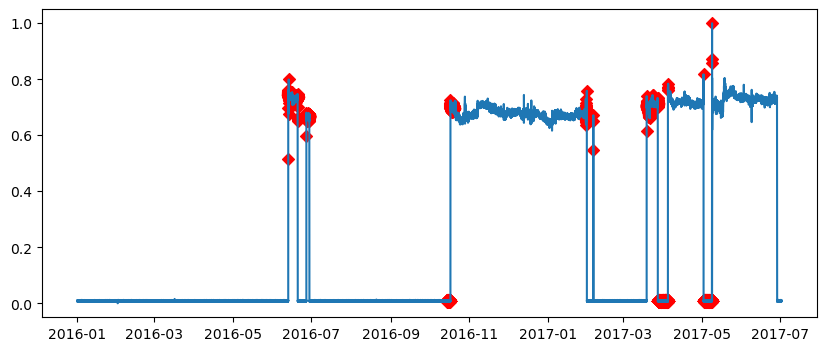

In [12]:
# Plot anomalies
plt.figure(figsize = (10,4))
plt.plot(df['y1'])
plt.scatter(anomalies.index, anomalies.tolist(), color = 'r', marker = 'D')

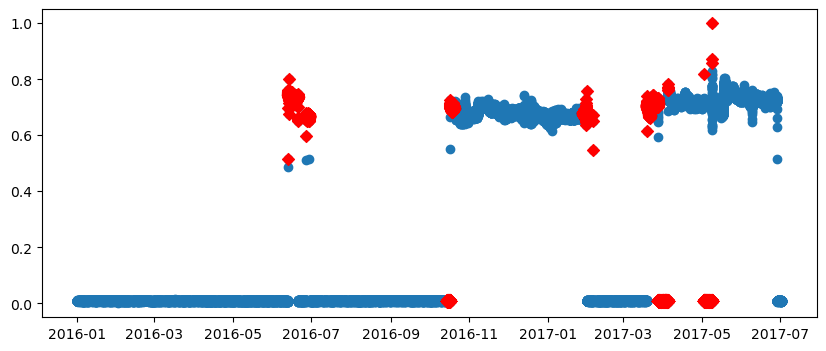

In [13]:
# Plot anomalies
plt.figure(figsize = (10,4))
plt.scatter(df.index, df['y1'])
plt.scatter(anomalies.index, anomalies.tolist(), color = 'r', marker = 'D')

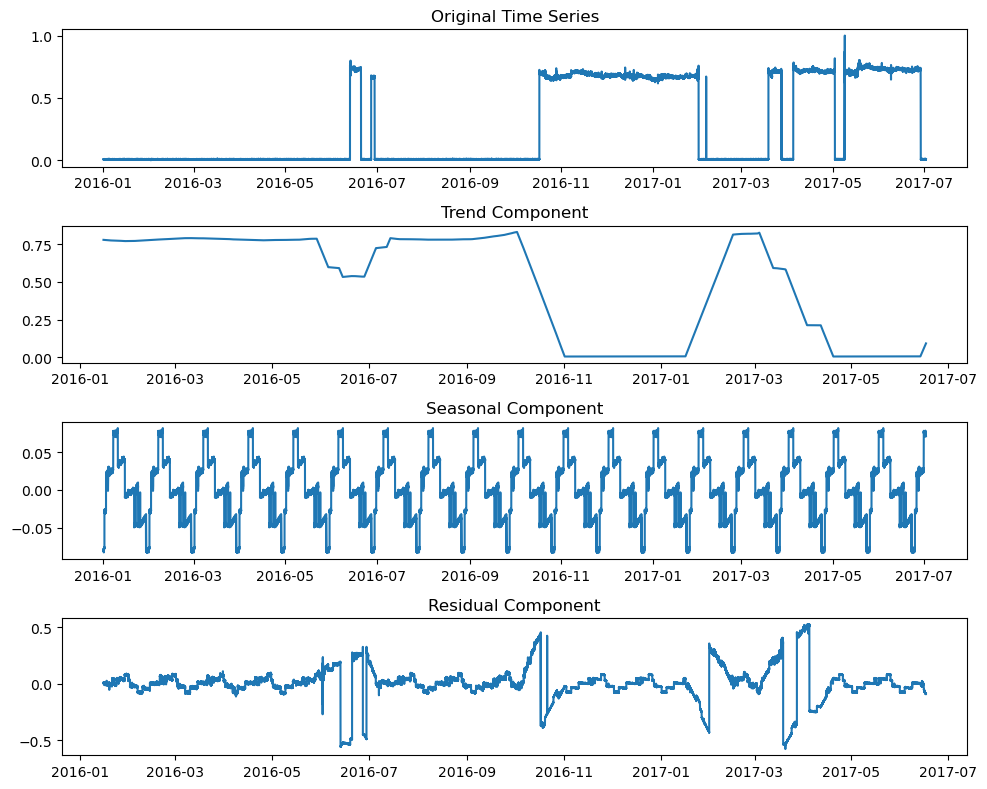

In [14]:
# Perform seasonal decomposition for 30 day time period (y2)
decomposition = seasonal_decompose(df['y2'], model='additive', period=288*30)

# Extract the trend, seasonality, and residual components
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
fig, axs = plt.subplots(4, 1, figsize=(10, 8))

axs[0].plot(df['y1'])
axs[0].set_title('Original Time Series')

axs[1].plot(trend)
axs[1].set_title('Trend Component')

axs[2].plot(seasonality)
axs[2].set_title('Seasonal Component')

axs[3].plot(residual)
axs[3].set_title('Residual Component')

plt.tight_layout()
plt.show()

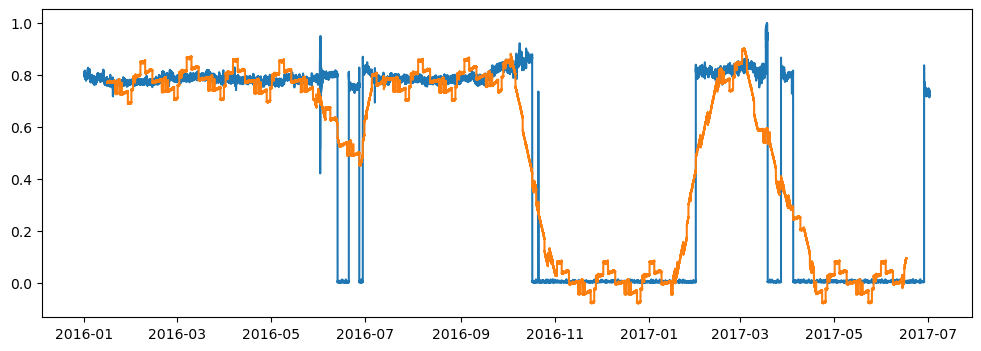

In [15]:
# Plot the coverage of trend and seasonality
estimated = trend+seasonality
plt.figure(figsize=(12, 4))
plt.plot(df['y2'])
plt.plot(estimated)

In [16]:
# Calculate residual mean and standard deviation 

residMean = residual.mean()
residSigma = residual.std()

# Calculate upper & lower bound
# Threshold is +/-2 SD

lower = residMean- 2*residSigma
upper = residMean+ 2*residSigma

(16801.0, 17348.0)

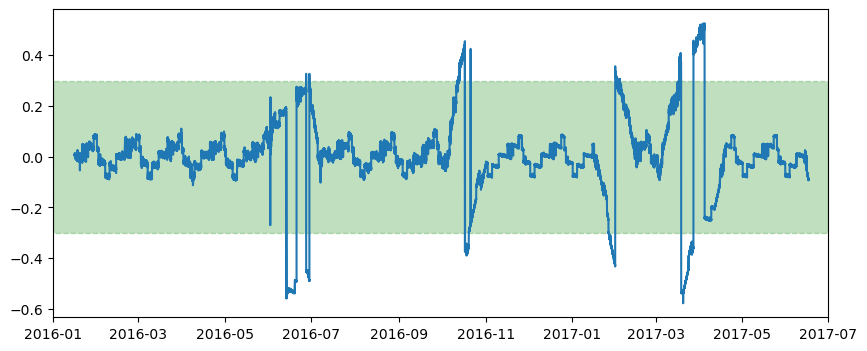

In [17]:
# Plot the threshold boundaries

plt.figure(figsize = (10,4))
plt.plot(residual)
plt.fill_between([datetime(2016,1,1), datetime(2017,7,1)], lower, upper, color = 'g',
                alpha = 0.25, linestyle = '--')
plt.xlim(datetime(2016,1,1), datetime(2017,7,1))

In [18]:
# Calculate anomalies

anomalies = df['y2'][(residual < lower) | (residual > upper)]

In [19]:
# Number of Anomalies Identified
anomalies.shape

(11567,)

In [20]:
anomalies.head()

2016-06-13 06:05:00    0.003968
2016-06-13 06:10:00    0.004741
2016-06-13 06:15:00    0.003736
2016-06-13 06:20:00    0.003548
2016-06-13 06:25:00    0.003404
Name: y2, dtype: float64

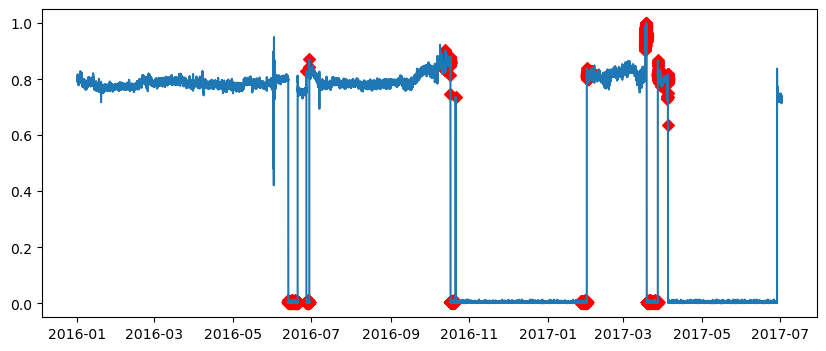

In [21]:
# Plot anomalies

plt.figure(figsize = (10,4))
plt.plot(df['y2'])
plt.scatter(anomalies.index, anomalies.tolist(), color = 'r', marker = 'D')

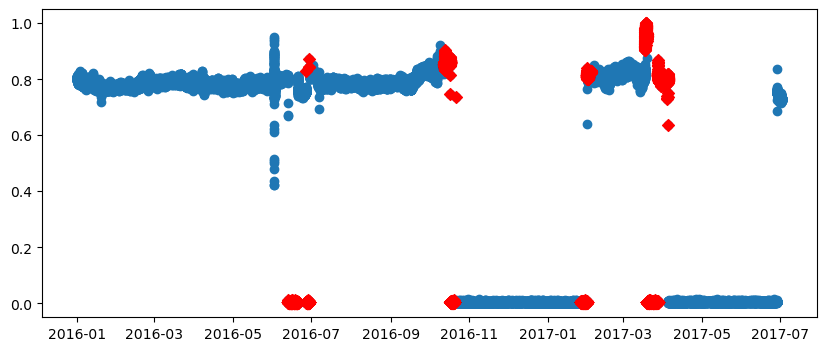

In [23]:
# Plot anomalies

plt.figure(figsize = (10,4))
plt.scatter(df.index, df['y2'])
plt.scatter(anomalies.index, anomalies.tolist(), color = 'r', marker = 'D')